# Titanic Survival Prediction Using Neural Networks

This lab focuses on building and training a neural network model to predict survival on the Titanic.

## Titanic Dataset

In [ ]:
!ls /content/gdrive/MyDrive/대학원

 datascience_programming   machine_learning.ipynb  '머신러닝 수업'


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

# root_dir = "PATH/TO/YOUR/DIRECTORY"
root_dir = "/content/gdrive/MyDrive/Colab Notebooks/week11_titanic_nn.ipynb"

# Checking if our specified directory exists
os.path.exists(root_dir)

True

In [ ]:
import pandas as pd
import os

# Paths to the downloaded files
data_path = "/content/gdrive/MyDrive/titanic_train.csv"

# Load data
df = pd.read_csv(data_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
random_state = 100
target = "Survived"

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Variable Selection

Eliminate variables that are not utilized as inputs or that contain numerous missing values.

In [ ]:
drop_vars = ["Name", "PassengerId", "Ticket", "Cabin"]
df.drop(drop_vars, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Missing Value Imputation

* [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer): Univariate imputer for completing missing values with simple strategies.
* [sklearn.impute.KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer): Imputation for completing missing values using k-Nearest Neighbors. Each sample’s missing values are imputed using the mean value from `n_neighbors` nearest neighbors found in the training set.
* [sklearn.impute.IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer): Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. (Default estimator: `BayesianRidge`)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

df_imputed = df.copy()

# Mode imputation
imputer = SimpleImputer(strategy='most_frequent')
df_imputed[['Embarked']] = imputer.fit_transform(df[['Embarked']])


features = ['Age', 'Pclass', 'SibSp', 'Parch']  # Ensure all features are numerical

# # K-Nearest Neighbors (KNN) Imputation
# imputer = KNNImputer(n_neighbors=5)

# Multivariate Imputation by Chained Equations (MICE)
imputer = IterativeImputer()

# # Random Forest Imputation
# imputer = IterativeImputer(estimator=RandomForestRegressor())

df_imputed[features] = imputer.fit_transform(df[features])

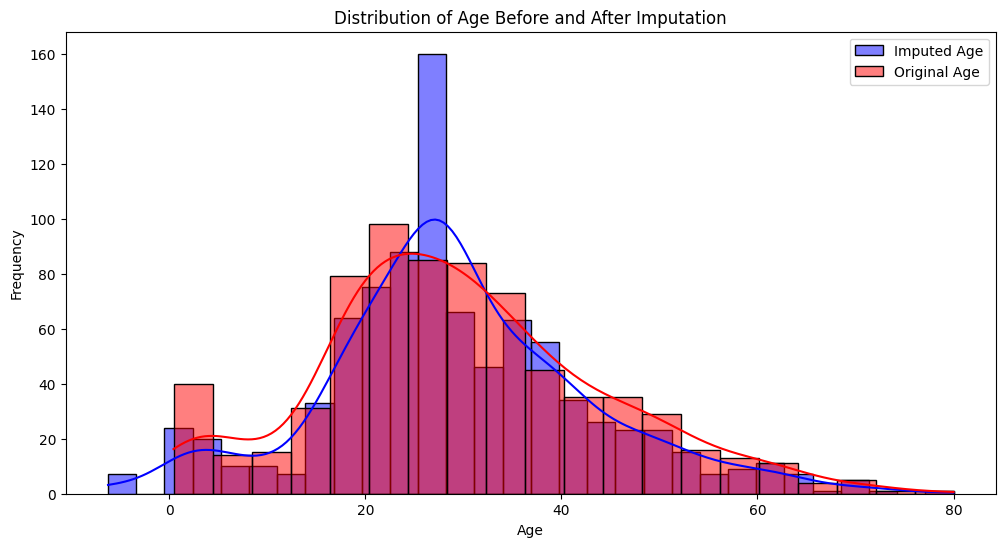

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_imputed['Age'], kde=True, color='blue', alpha=0.5, label='Imputed Age')
sns.histplot(df['Age'].dropna(), kde=True, color='red', alpha=0.5, label='Original Age')
plt.legend()
plt.title('Distribution of Age Before and After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = df_imputed

### Handling Categorical Variables

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,male,22.000000,1.0,0.0,7.2500,S
1,1,1.0,female,38.000000,1.0,0.0,71.2833,C
2,1,3.0,female,26.000000,0.0,0.0,7.9250,S
3,1,1.0,female,35.000000,1.0,0.0,53.1000,S
4,0,3.0,male,35.000000,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2.0,male,27.000000,0.0,0.0,13.0000,S
887,1,1.0,female,19.000000,0.0,0.0,30.0000,S
888,0,3.0,female,21.030944,1.0,2.0,23.4500,S
889,1,1.0,male,26.000000,0.0,0.0,30.0000,C


In [ ]:
df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

var = "Embarked"
one_hot = pd.get_dummies(df[var], prefix=var)
df = pd.concat([df, one_hot], axis=1).drop([var], axis=1)

df

/tmp/ipython-input-4238601523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3.0,0,22.000000,1.0,0.0,7.2500,False,False,True
1,1,1.0,1,38.000000,1.0,0.0,71.2833,True,False,False
2,1,3.0,1,26.000000,0.0,0.0,7.9250,False,False,True
3,1,1.0,1,35.000000,1.0,0.0,53.1000,False,False,True
4,0,3.0,0,35.000000,0.0,0.0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,0,27.000000,0.0,0.0,13.0000,False,False,True
887,1,1.0,1,19.000000,0.0,0.0,30.0000,False,False,True
888,0,3.0,1,21.030944,1.0,2.0,23.4500,False,False,True
889,1,1.0,0,26.000000,0.0,0.0,30.0000,True,False,False


In [ ]:
features = df.drop(target, axis=1).columns
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Outlier Detection

* Using Z-score, Interquartile Range (IQR)
* [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html): The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
* [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html): Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Noisy samples are given the label -1.

#### IsolationForest

Outliers detected: 18


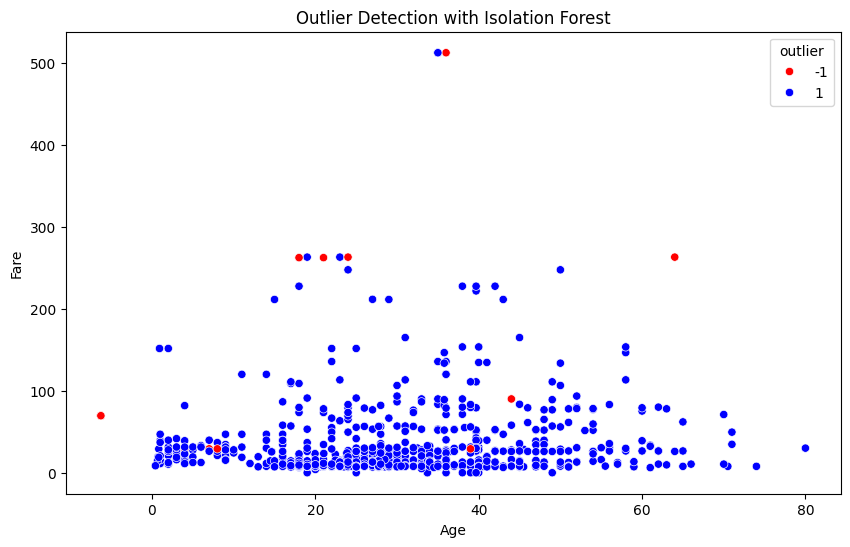

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

df_outlier = df.copy()

iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=random_state)
outliers = iso_forest.fit_predict(df_outlier[features])

print("Outliers detected:", np.sum(outliers == -1))
df_outlier['outlier'] = outliers

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='outlier', data=df_outlier, palette={-1: 'red', 1: 'blue'})
plt.title('Outlier Detection with Isolation Forest')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

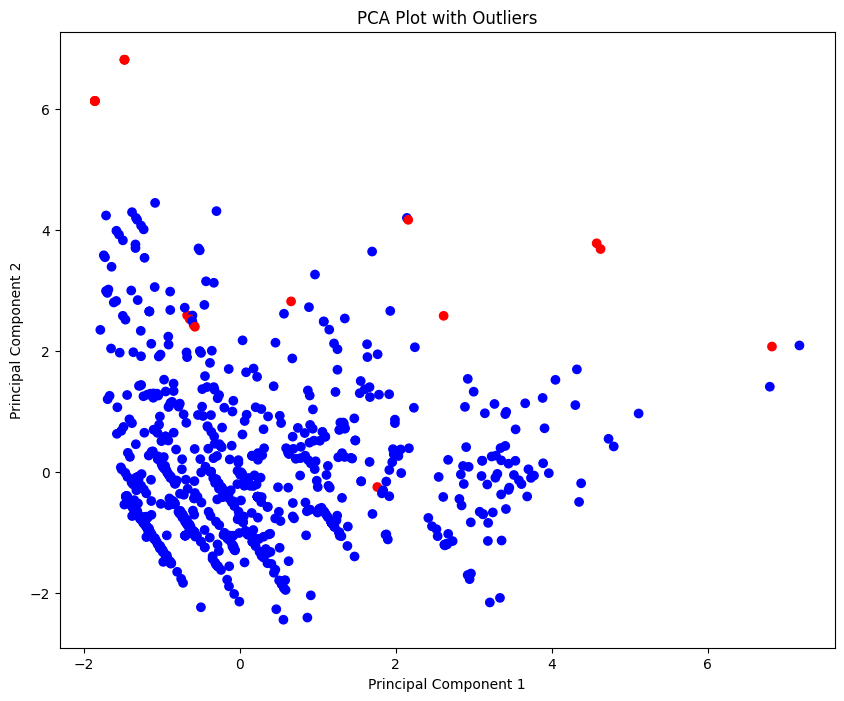

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_outlier[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))

colors = {1: 'blue', -1: 'red'}
marker_colors = [colors[label] for label in df_outlier['outlier']]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=marker_colors, marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers')
plt.show()

### DBSCAN

<img src="https://machinelearninggeek.com/wp-content/uploads/2020/10/image-58.png" width="800">

Number of outliers: 7


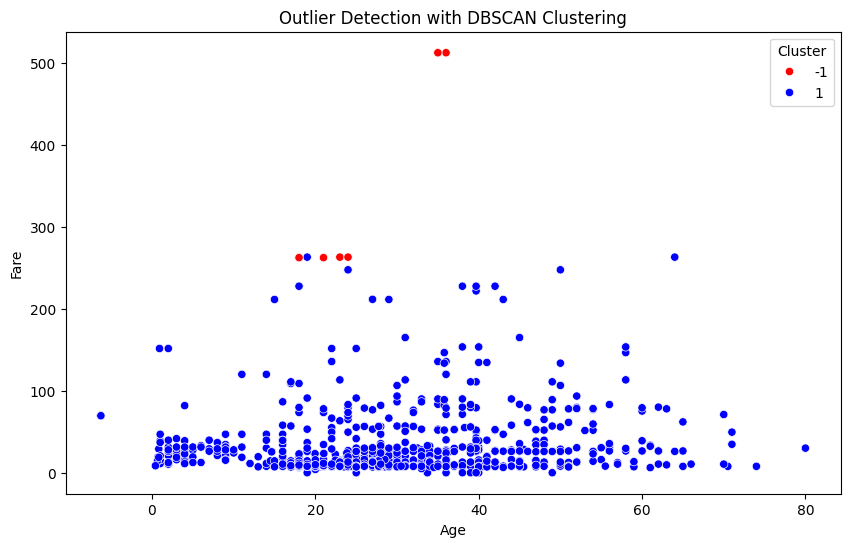

In [ ]:
from sklearn.cluster import DBSCAN

df_outlier = df.copy()

dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

outliers = np.sum(clusters == -1)
print("Number of outliers:", outliers)
df_outlier['outlier'] = np.where(clusters == -1, -1, 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='outlier', data=df_outlier, palette={-1: 'red', 1: 'blue'})
plt.title('Outlier Detection with DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster')
plt.show()

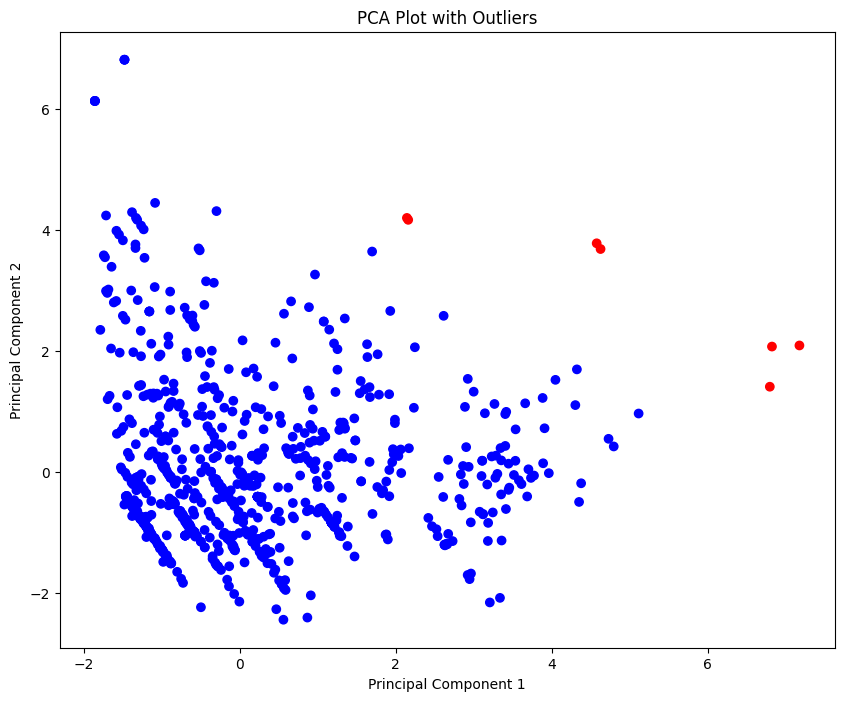

In [ ]:
fig = plt.figure(figsize=(10, 8))

colors = {1: 'blue', -1: 'red'}
marker_colors = [colors[label] for label in df_outlier['outlier']]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=marker_colors, marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers')
plt.show()

### Data Split

Split the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

shuffle = True
test_size_ratio = 0.25

train_df, test_df = train_test_split(df, test_size=test_size_ratio, random_state=random_state, shuffle=shuffle)
print(train_df.shape, test_df.shape)

(668, 10) (223, 10)


In [ ]:
X_train = train_df.drop(target, axis=1).values
y_train = train_df[target].values

X_test = test_df.drop(target, axis=1).values
y_test = test_df[target].values

target_names = ["Not survived", "Survived"]
feature_names = train_df.drop(target, axis=1).columns

### Data Normalization

Utilizes [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn to normalize the training and testing datasets.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training and Evaluation using Scikit-Learn

### Training

* MLP Classifier ([sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))

Iteration 1, loss = 0.63125005
Iteration 2, loss = 0.49694789
Iteration 3, loss = 0.43732503
Iteration 4, loss = 0.41886353
Iteration 5, loss = 0.41155748
Iteration 6, loss = 0.39683680
Iteration 7, loss = 0.38542317
Iteration 8, loss = 0.38680304
Iteration 9, loss = 0.37422933
Iteration 10, loss = 0.37465966
Iteration 11, loss = 0.37088112
Iteration 12, loss = 0.36304436
Iteration 13, loss = 0.36068048
Iteration 14, loss = 0.35854548
Iteration 15, loss = 0.35642162
Iteration 16, loss = 0.35106229
Iteration 17, loss = 0.35010705
Iteration 18, loss = 0.35036029
Iteration 19, loss = 0.34572238
Iteration 20, loss = 0.34272282
Iteration 21, loss = 0.34133615
Iteration 22, loss = 0.33947784
Iteration 23, loss = 0.34049816
Iteration 24, loss = 0.33632218
Iteration 25, loss = 0.33457322
Iteration 26, loss = 0.33196130
Iteration 27, loss = 0.33466690
Iteration 28, loss = 0.32876914
Iteration 29, loss = 0.32872146
Iteration 30, loss = 0.32221564
Iteration 31, loss = 0.32601099
Iteration 32, los

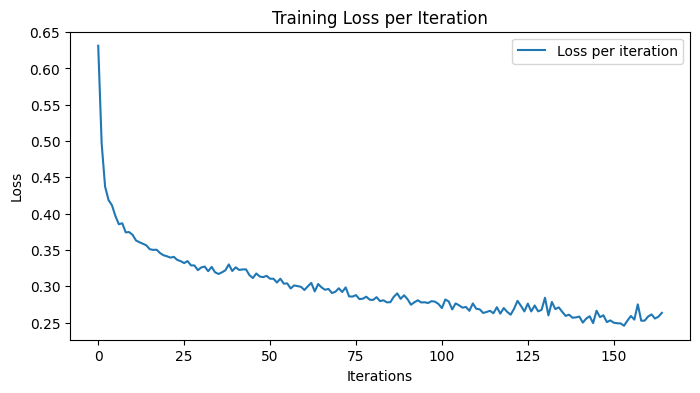

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 30),
                      max_iter=300,
                      activation='relu',
                      solver='adam',
                      batch_size=200,
                      learning_rate='invscaling',
                      learning_rate_init=0.01,
                      power_t=0.5,  # Exponent for inverse scaling learning rate
                      warm_start=True,
                      random_state=random_state,
                      verbose=True) # Enable verbose to monitor

# Fit the model
model.fit(X_train, y_train)

# Access the loss_curve_ attribute
loss_values = model.loss_curve_

# Plot the loss curve
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Loss per iteration')
plt.title('Training Loss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation

In [ ]:
y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[1.24439133e-02 9.87556087e-01]
 [4.98532724e-01 5.01467276e-01]
 [9.49780746e-01 5.02192543e-02]
 [4.30264262e-02 9.56973574e-01]
 [8.15177705e-01 1.84822295e-01]
 [9.90104116e-01 9.89588433e-03]
 [9.95793535e-01 4.20646451e-03]
 [9.99999996e-01 3.74595059e-09]
 [5.52761688e-06 9.99994472e-01]
 [9.92258455e-01 7.74154489e-03]]
Estimated classes: [1 1 0 1 0 0 0 0 1 0]



* Accuracy ([metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))
* F1 ([metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))
* ROC AUC ([metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.7892376681614349
F1: 0.7251461988304093
ROC AUC: 0.8446932414698163


* Confusion Matrix ([metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted Not-Survived", "Predicted Survived"],
    index=["Actual Not-Survived", "Actual Survived"]
)
print(conf_matrix_df)

                     Predicted Not-Survived  Predicted Survived
Actual Not-Survived                     114                  13
Actual Survived                          34                  62


* ROC Curve ([metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html))

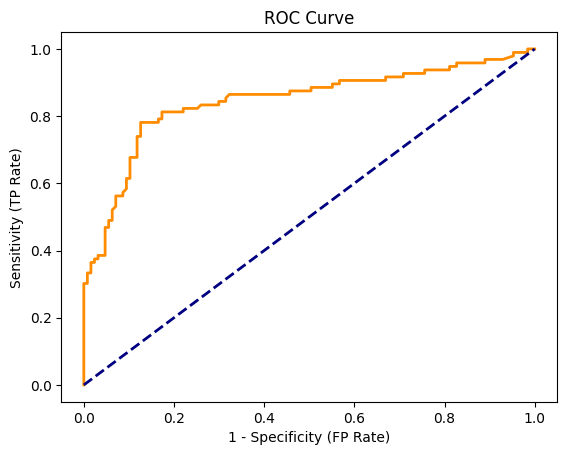

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()

### [SHAP (SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/index.html)

SHAP은 **머신러닝 모델의 예측 결과를 해석하기 위한 대표적인 XAI(설명가능 인공지능)** 기법입니다.  
각 feature가 모델의 예측값에 **얼마나, 어떤 방향으로 기여했는지**를 수치적으로 보여줍니다.

#### 기본 아이디어
- 게임이론의 **Shapley value** 개념을 사용합니다.  
  (각 feature를 “플레이어”, 모델의 예측값을 “게임 점수”로 간주)
- 한 feature가 빠졌을 때와 포함되었을 때의 **예측 차이의 평균 기여도**를 계산합니다.

$$
\phi_i = \sum_{S \subseteq F \setminus \{i\}}
\frac{|S|!(|F|-|S|-1)!}{|F|!}
\big[f(S \cup \{i\}) - f(S)\big]
$$

#### 해석 방법
- **SHAP value > 0** → 해당 feature가 예측값을 **높이는 방향**으로 기여  
- **SHAP value < 0** → 예측값을 **낮추는 방향**으로 기여  
- **값의 크기** → 영향력의 크기  

#### 대표 시각화
- **Force plot**: 개별 샘플의 예측에 대한 feature별 기여도  
- **Beeswarm plot**: 전체 데이터에서 feature 중요도 및 영향 방향  
- **Bar plot**: 평균 SHAP 값으로 feature importance 표시

In [ ]:
import shap

background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explainer = shap.TreeExplainer(model)
explainer = shap.KernelExplainer(model.predict_proba, background)

sample = X_test[[0]]
shap_values = explainer.shap_values(sample, nsamples=100)
sample_original = scaler.inverse_transform(sample)

shap.initjs()
shap.force_plot(
    explainer.expected_value[1],  # Expected value for the 'Survived' class
    shap_values[0][:, 1],         # SHAP values for the 'Survived' class
    sample_original,
    feature_names=feature_names
)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/223 [00:00<?, ?it/s]

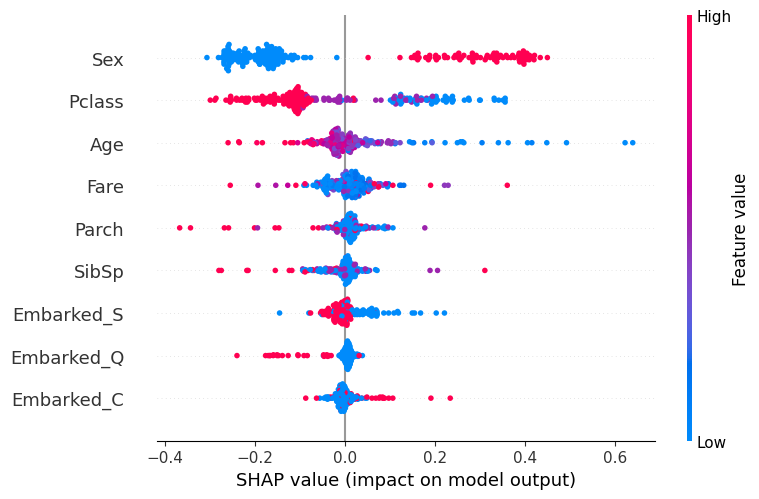

In [ ]:
shap_values = explainer.shap_values(X_test, nsamples=100)
X_test_original = scaler.inverse_transform(X_test)

shap.summary_plot(
    shap_values[:, :, 1], # SHAP values for all samples, for class 1 (Survived)
    X_test_original,
    feature_names=feature_names,
    plot_type="dot"
)

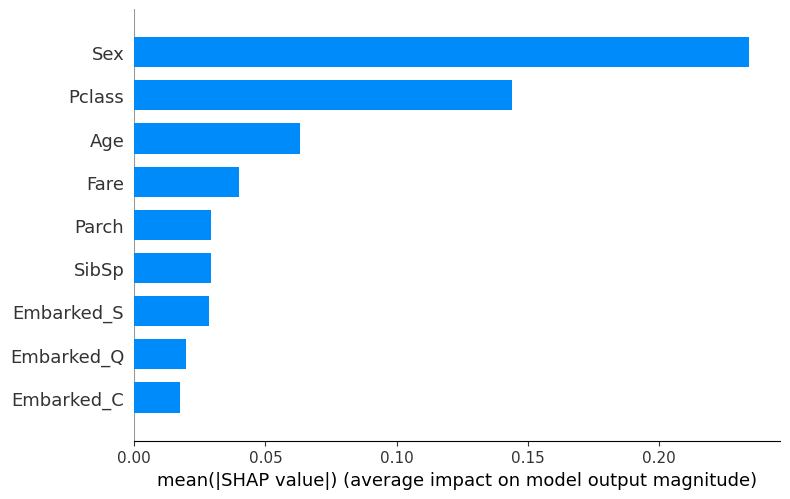

In [ ]:
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_original,
    feature_names=feature_names,
    plot_type="bar"
)